## **CAPSTONE MODULE 2**

## Latar Belakang

Dalam era persaingan bisnis yang semakin kompetitif, memahami perilaku dan karakteristik pelanggan merupakan salah satu faktor kunci dalam mempertahankan loyalitas serta meningkatkan penjualan. Supermarket sebagai salah satu sektor ritel yang padat kompetisi memerlukan pendekatan berbasis data untuk dapat merancang strategi pemasaran yang lebih efektif dan personal.

Dataset yang dianalisis merupakan kumpulan data pelanggan dari sebuah supermarket, yang mencakup informasi demografis (seperti umur, tingkat pendidikan, dan status pernikahan), variabel ekonomi (seperti pendapatan tahunan), serta data perilaku konsumen (seperti jumlah pembelian berdasarkan channel, total pengeluaran produk, dan respon terhadap berbagai kampanye promosi).

In [411]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [412]:
# load dataset
df = pd.read_csv("Supermarket Customers.csv", delimiter = "\t")
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


**Column Dictionary**

People :
1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products :
1. MntWines: Amount spent on wine in last 2 years
2. MntFruits: Amount spent on fruits in last 2 years
3. MntMeatProducts: Amount spent on meat in last 2 years
4. MntFishProducts: Amount spent on fish in last 2 years
5. MntSweetProducts: Amount spent on sweets in last 2 years
6. MntGoldProds: Amount spent on gold in last 2 years

Promotion :
1. NumDealsPurchases: Number of purchases made with a discount
2. AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
3. AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
4. AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
5. AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
6. AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
7. Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

Place :
1. NumWebPurchases: Number of purchases made through the company’s website
2. NumCatalogPurchases: Number of purchases made using a catalog
3. NumStorePurchases: Number of purchases made directly in stores
4. NumWebVisitsMonth: Number of visits to the company’s website in the last month

## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset Supermarket_Customer (df)

In [413]:
# informasi dataset
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [414]:
# mengubah tipe data yang kurang relevan --> ID ke string
df["ID"] = df["ID"].astype(str)

In [415]:
from datetime import datetime

In [416]:
# mengubah tipe data yang kurang relevan --> Dt_Customer ke datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
df["Dt_Customer"] = df["Dt_Customer"].dt.strftime("%d-%m-%Y")
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [418]:
# copy dataset ke df_new
df_new = df.copy()
df_new.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [419]:
display(df_new.describe(), df_new.describe(include='object'))

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


,ID,Education,Marital_Status
count,2240,2240,2240
unique,2240,5,8
top,5524,Graduation,Married
freq,1,1127,864


In [420]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df_new.columns :
    listItem.append( [col, df_new[col].nunique(), df_new[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2013-03-28 00:00:00, 2012-11-03 00:00:00, 2012-08-08 00:00:00, 2013-01-06 00:00:00, 2012-12-23 00:00:00, 2014-01-11 00:00:00, 2013-03-18 00:00:00, 2013-01-02 00:00:00, 2013-05-27 00:00:00, 2013-02-20 00:00:00, 2013-05-31 00:00:00, 2013-11-22 00:00:00, 2014-05-22 00:00:00, 2013-05-11 00:00:00, 2012-10-29 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-09-02 00:00:00, 2014-02-11 00:00:00, 2013-02-01 00:00:00, 2013-04-29 00:00:00, 2013-03-12 00:00:00, 2013-11-05 00:00:00, 2013-10-02 00:00:00, 2014-06-28 00:00:00, 2012-11-09 00:00:00, 2013-05-24 00:00:00, 2014-01-01 00:00:00, 2012-11-08 00:00:00, 2014-05-12 00:00:00, 2012-08-11 00:00:00, 2014-06-07 00:00:00, 2013-06-12 00:00:00, 2012-11-19 00:00:00, 2013-04-02 00:00:00, 2014-04-28 00:00:00, 2013-06-17 00:00:00, 2014-03-03 00:00:00, 2013-07-04 00:00:00, 2012-09-07 00:00:00, 2013-02-18 00:00:00, 2013-06-11 00:00:00, 2013-12-06 00:00:00, 2013-05-21 00:00:00, 2014-05-11 00:00:00, 2014-03-19 00:00:00, 2013-09-27 00:00:00, 2013-04-08 00:00:00, 2012-09-11 00:00:00, 2012-09-14 00:00:00, 2013-03-17 00:00:00, 2013-04-05 00:00:00, 2014-04-30 00:00:00, 2012-12-19 00:00:00, 2012-08-27 00:00:00, 2012-10-12 00:00:00, 2013-09-04 00:00:00, 2012-08-29 00:00:00, 2013-06-23 00:00:00, 2013-07-03 00:00:00, 2014-02-25 00:00:00, 2013-08-11 00:00:00, 2013-07-16 00:00:00, 2014-05-28 00:00:00, 2014-01-21 00:00:00, 2014-05-27 00:00:00, 2013-11-23 00:00:00, 2014-03-23 00:00:00, 2014-05-24 00:00:00, 2012-11-22 00:00:00, 2013-04-11 00:00:00, 2013-12-01 00:00:00, 2013-06

In [421]:
# drop kolom yang tidak dibutuhkan
df_new.drop(columns = ["Z_CostContact", "Z_Revenue"] , inplace = True)
df_new

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In [422]:
# mengecek apakah ada duplikat
df_new.duplicated().sum()

0

In [423]:
# persentase missing value di tiap kolom
df_new.isna().sum()/df_new.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [424]:
df_new.isna().sum()

ID                     0 
Year_Birth             0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Response               0 
dtype: int64

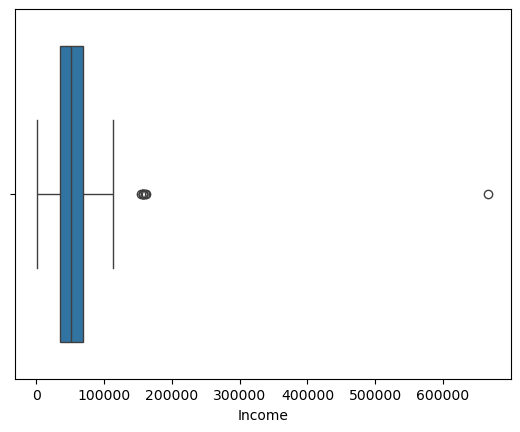

In [425]:
# menampilkan kolom income dalam bentuk boxplot, apakah ada data outliers atau tidak
sns.boxplot(data = df_new,
            x = "Income")
plt.show()

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan dalam beberapa kasus, terutama jika jumlah missing value yang tergolong cukup tinggi.
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

Keputusan yang diambil :

Dari data yang sudah di rapikan, masih terdapat missing value pada kolom `income`, dimana hanya terdapat 24 data saja yang hilang (sekitar 1%). Berdasarkan boxplot yang sudah dibuat, ternyata nilai pada kolom `income` memiliki outliers, sehingga baiknya kita menggunakan median untuk mengisi kekosongan pada `income`.

In [426]:
df_new.fillna(df["Income"].median(), inplace = True)

In [427]:
df_new.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [428]:
display(df_new.describe(),df_new.describe(include='object'))

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,11.984069,25037.955891,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274


,ID,Education,Marital_Status
count,2240,2240,2240
unique,2240,5,8
top,5524,Graduation,Married
freq,1,1127,864


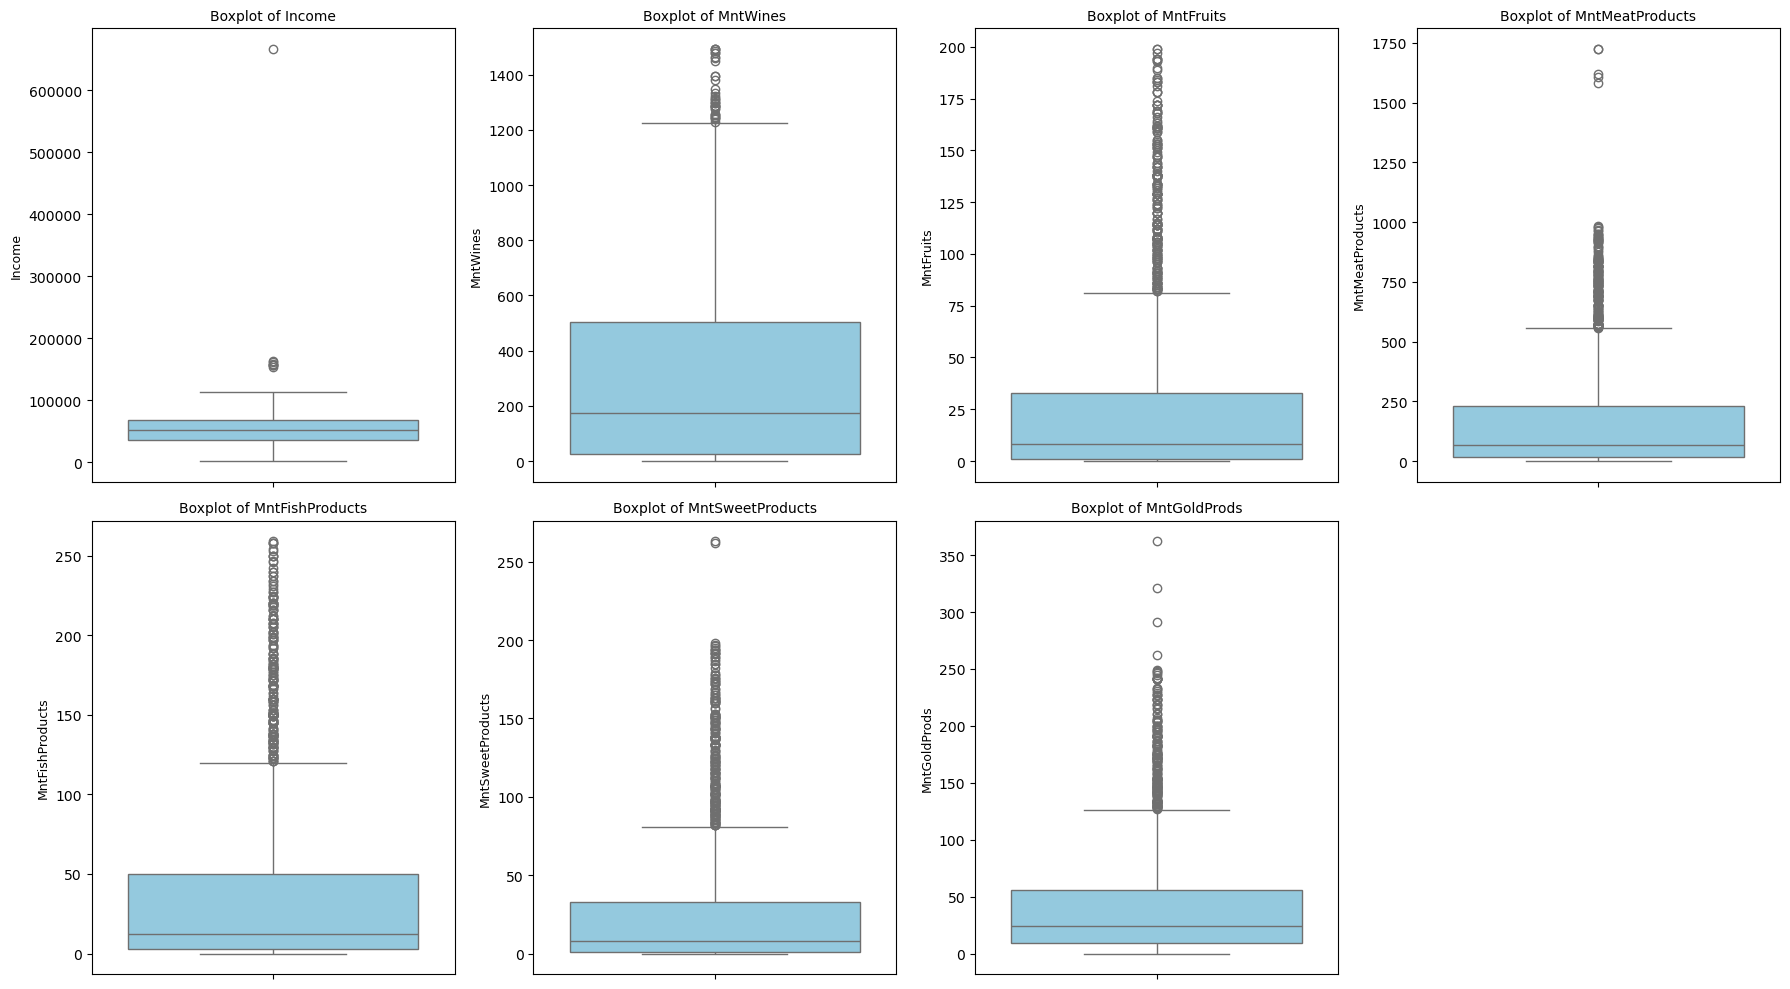

In [429]:
# Kolom numerik yang ingin divisualisasikan
num_cols = [
    "Income",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds"
]

# Ukuran canvas
plt.figure(figsize=(18, 10))

# Buat subplot untuk setiap kolom
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i + 1)  # 2 baris x 4 kolom (karena 7 kolom)
    sns.boxplot(y=df_new[col], color='skyblue')  # arahkan ke sumbu y
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.ylabel(col, fontsize=9)
    plt.xlabel("")  # biar tidak terlalu padat
    plt.tight_layout()

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan.

In [430]:
listItem = []
for col in df_new.columns :
    listItem.append([col, df_new[col].dtype, df_new[col].isna().sum(),
                    df_new[col].nunique(), list(df_new[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df_new.shape)
dfDesc

(2240, 27)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,object,0,2240,"[8755, 10854]"
1,Year_Birth,int64,0,59,"[1975, 1990]"
2,Education,object,0,5,"[Basic, PhD]"
3,Marital_Status,object,0,8,"[Single, Married]"
4,Income,float64,0,1975,"[35765.0, 92556.0]"
5,Kidhome,int64,0,3,"[1, 2]"
6,Teenhome,int64,0,3,"[1, 2]"
7,Dt_Customer,datetime64[ns],0,663,"[2013-05-28T00:00:00.000000000, 2013-12-22T00:00:00.000000000]"
8,Recency,int64,0,100,"[35, 28]"
9,MntWines,int64,0,776,"[367, 1184]"


In [431]:
df_new.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [432]:
df_new.to_csv("Supermarket Customers_Cleaned.csv")

## Data Analysis
Kita sudah melakukan tahap _data cleaning_.



Sekarang kita memasuki tahap analisis terhadap data Supermarket_Customer.
Pertanyaan Bisnis:
1. Siapa pelanggan yang paling menguntungkan?
2. Apakah tingkat pendidikan berpengaruh terhadap income dan juga pengeluaran?
3. Apakah ada hubungan antara Pengeluaran dan Pembelian?
4. Channel belanja mana yang paling sering digunakan pelanggan?
5. Apakah jumlah anak mempengaruhi belanja?
6. Kampanye marketing mana yang paling berhasil?
7. Produk apa yang paling banyak dibeli oleh para pelanggan?

## Berdasarkan Pelanggan:

Pertama, mari kita lihat pelanggan dengan nomor ID berapa yang memiliki total pengeluaran paling tinggi. Dari sini kita akan membuat kolom baru yaitu `Total Spending` untuk menjumlahkan pengeluaran dari berbagai jenis produk yang ada.

Kita akan mengurutkan 10 pelanggan dari pengeluaran terbesar ke terkecil.

In [433]:
# Menghitung total belanja dari semua kategori
spending_columns =[
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds"
]

# Membuat kolom baru yaitu Total Spending dari hasil jumlah pengeluaran
df_new["Total Spending"] = df_new[spending_columns].sum(axis=1)

# Mengurutkan 10 customer berdasarkan spending terbesar ke terkecil
top_customers = df_new.sort_values(by = "Total Spending", ascending = False).head(10)

C:\Users\Sarah Agnisa\AppData\Local\Temp\ipykernel_1600\2169499899.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


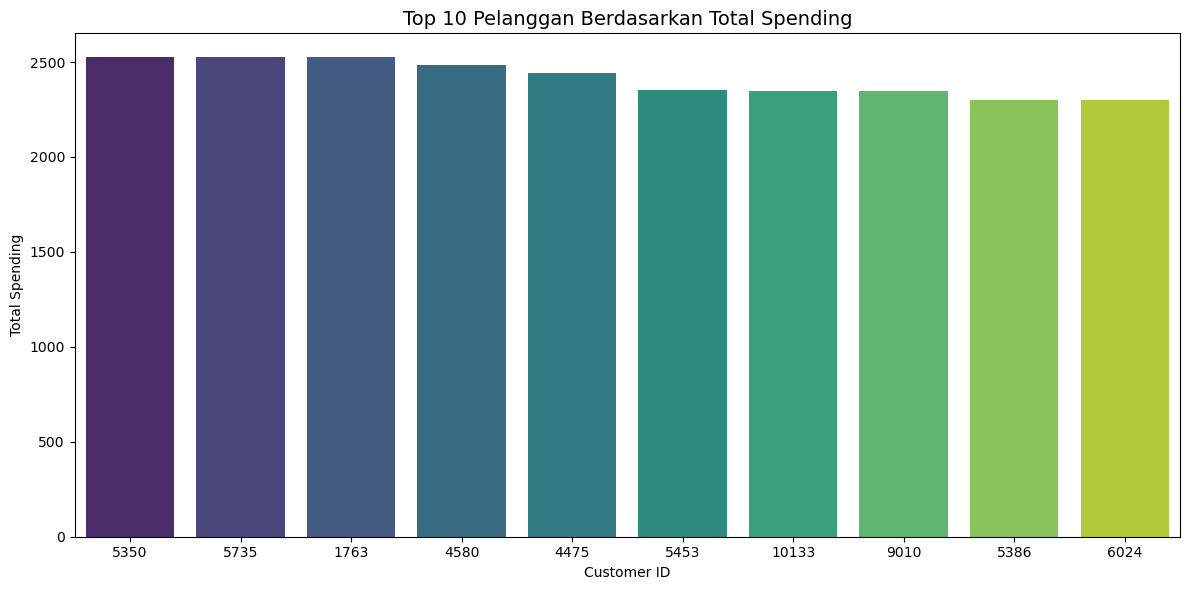

In [434]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=top_customers,
    x="ID",
    y="Total Spending",
    palette="viridis"
)
plt.title("Top 10 Pelanggan Berdasarkan Total Spending", fontsize=14)
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.tight_layout()
plt.show()

In [435]:
# Membuat tabel untuk 10 customer tertinggi
summary_top_customers = top_customers[[
    "ID", "Year_Birth", "Income", "Education", "Marital_Status",
    "Kidhome", "Teenhome", "Dt_Customer", "Total Spending"
]]
summary_top_customers

,ID,Year_Birth,Income,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Total Spending
1572,5350,1991,90638.0,Master,Single,0,0,2014-02-13,2525
1179,5735,1991,90638.0,Master,Single,0,0,2014-02-13,2525
1492,1763,1988,87679.0,Graduation,Together,0,0,2013-07-27,2524
987,4580,1969,75759.0,Graduation,Married,0,0,2013-10-25,2486
1052,4475,1949,69098.0,PhD,Married,0,0,2013-02-16,2440
1601,5453,1956,90226.0,Master,Married,0,0,2012-09-26,2352
1458,10133,1970,93790.0,Graduation,Single,0,0,2014-02-12,2349
1288,9010,1972,83151.0,Master,Married,0,0,2013-02-10,2346
943,5386,1953,94384.0,Graduation,Together,0,0,2013-03-04,2302
1301,6024,1953,94384.0,Graduation,Together,0,0,2013-03-04,2302


Dari data di atas, dapat diketahui bahwa :
- Total spending tertinggi melebihi angka 2300
- Pelanggan yang memiliki spending tinggi mostly memiliki tingkat `Education` yang cukup tinggi (Graduation, Master, PhD)
- Pelanggan yang memiliki spending tinggi mostly tidak memiliki anak

Dari data tersebut, kita dapat melanjutkan analisis kita ke bagian `Education` terhadap rata-rata `Income` maupun `Total Spending`

---

## Berdasarkan `Education`

Kita akan menganalisis kolom  `Education`, `Income`, dan `Total Spending`.

Hal-hal yang nanti nya akan kita analisis adalah berupa :
- Rata-rata `Income` berdasarkan level `Education`
- Rata-rata `Total Spending` berdasarkan level `Education`
- Korelasi/Hubungan antara `Income` dan `Total Spending` berdasarkan level `Education`

**Tingkat Pendidikan Berpengaruh Terhadap Income & Pengeluaran**

In [436]:
# Pembagian rata-rata income & total spending berdasarkan education
education_summary = df_new.groupby("Education")[["Income", "Total Spending"]].mean()

C:\Users\Sarah Agnisa\AppData\Local\Temp\ipykernel_1600\1902965068.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= education_income_summary,


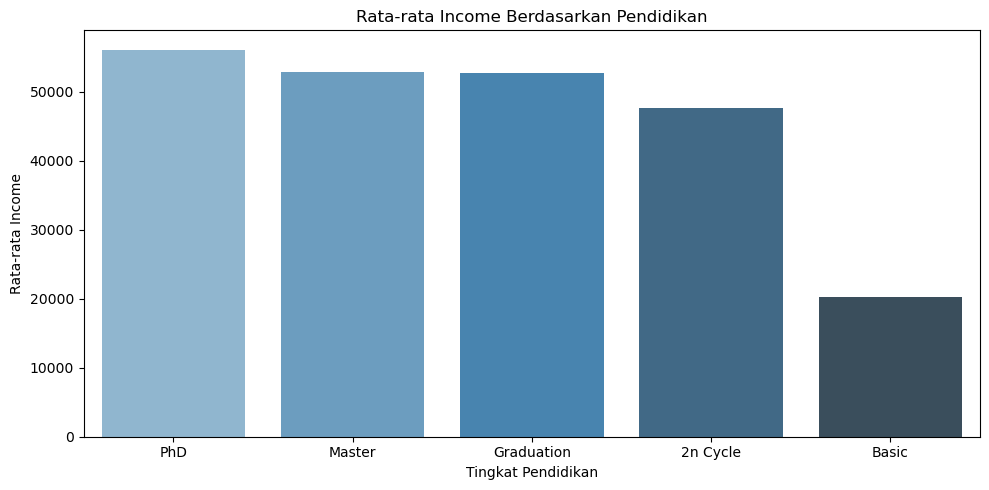

In [508]:
# Tabel income yang telah diurutkan
education_income_summary = education_summary.sort_values(by = "Income", ascending = False)

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(data= education_income_summary,
            x="Education",
            y="Income",
            palette="Blues_d")
plt.title("Rata-rata Income Berdasarkan Pendidikan")
plt.ylabel("Rata-rata Income")
plt.xlabel("Tingkat Pendidikan")
plt.tight_layout()
plt.show()

C:\Users\Sarah Agnisa\AppData\Local\Temp\ipykernel_1600\1805485087.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= education_expense_summary,


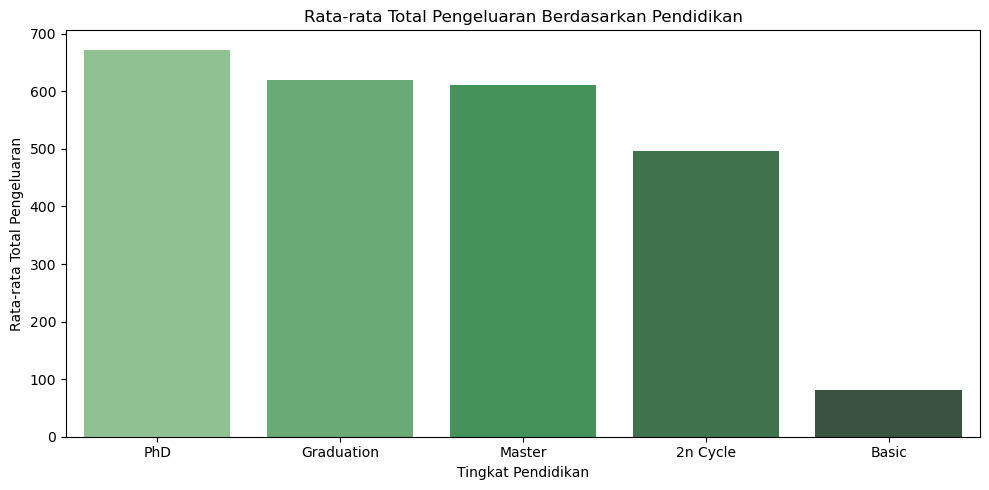

In [438]:
# Tabel total spending yang telah diurutkan
education_expense_summary = education_summary.sort_values(by = "Total Spending", ascending = False)

plt.figure(figsize=(10, 5))
sns.barplot(data= education_expense_summary,
            x="Education",
            y="Total Spending",
            palette="Greens_d")
plt.title("Rata-rata Total Pengeluaran Berdasarkan Pendidikan")
plt.ylabel("Rata-rata Total Pengeluaran")
plt.xlabel("Tingkat Pendidikan")
plt.tight_layout()
plt.show()

In [439]:
# table summary education
education_summary.sort_values(by = "Total Spending", ascending = False)

,Income,Total Spending
Education,,
PhD,56096.303498,672.409465
Graduation,52707.305679,619.898846
Master,52896.777027,611.781081
2n Cycle,47688.583744,496.527094
Basic,20306.259259,81.796296


Berdasarkan data visualisasi yang ditampilkan, dapat disimpulkan bahwa:
- Semakin tinggi tingkat pendidikan, maka semakin tinggi juga Total Spending
- Hal ini juga beriringan dengan Income


Untuk membuktikan korelasi/hubungan antara Total Spending dan Income, maka kita akan melakukan *pearson test*.

**Pearson Test** ini digunakan untuk mengukur korelasi linier antara dua variabel bertipe numerik

**Korelasi/Hubungan antara `Income` dan `Total Spending` berdasarkan level `Education`**

In [440]:
# Buat df baru untuk korelasi yang berisi Education, Income dan Total Spending
df_corr = df_new[["Education", "Income", "Total Spending"]].dropna()

df_corr

,Education,Income,Total Spending
0,Graduation,58138.0,1617
1,Graduation,46344.0,27
2,Graduation,71613.0,776
3,Graduation,26646.0,53
4,PhD,58293.0,422
...,...,...,...
2235,Graduation,61223.0,1341
2236,PhD,64014.0,444
2237,Graduation,56981.0,1241
2238,Master,69245.0,843


In [441]:
from scipy.stats import pearsonr

In [442]:
# Hitung korelasi per level pendidikan
correlation_by_education = []

for edu_level in df_corr["Education"].unique():
    subset = df_corr[df_corr["Education"] == edu_level]
    corr, pval = pearsonr(subset["Income"], subset["Total Spending"])
    correlation_by_education.append({
        "Education": edu_level,
        "Pearson_Correlation": round(corr, 3),
        "p-value": round(pval, 10)
    })

In [443]:
# Tampilkan sebagai DataFrame
correlation_df = pd.DataFrame(correlation_by_education)
print(correlation_df.sort_values(by="Pearson_Correlation", ascending=False))

    Education  Pearson_Correlation   p-value
4  2n Cycle    0.794                0.000000
2  Master      0.781                0.000000
1  PhD         0.708                0.000000
0  Graduation  0.605                0.000000
3  Basic       0.296                0.030005


**Hasil Uji Statistik:**
- Nilai p-value dari Pearson Test < 0.05 untuk semua level education (bahkan ada yang bernilai 0)
- Nilai Pearson Correlation juga cukup tinggi secara keseluruhan (> 0,6), maka berarti hubungannya beruapa linear positif
- Artinya, terdapat **hubungan yang sangat signifikan** antara `Income` dan `Total Spending`

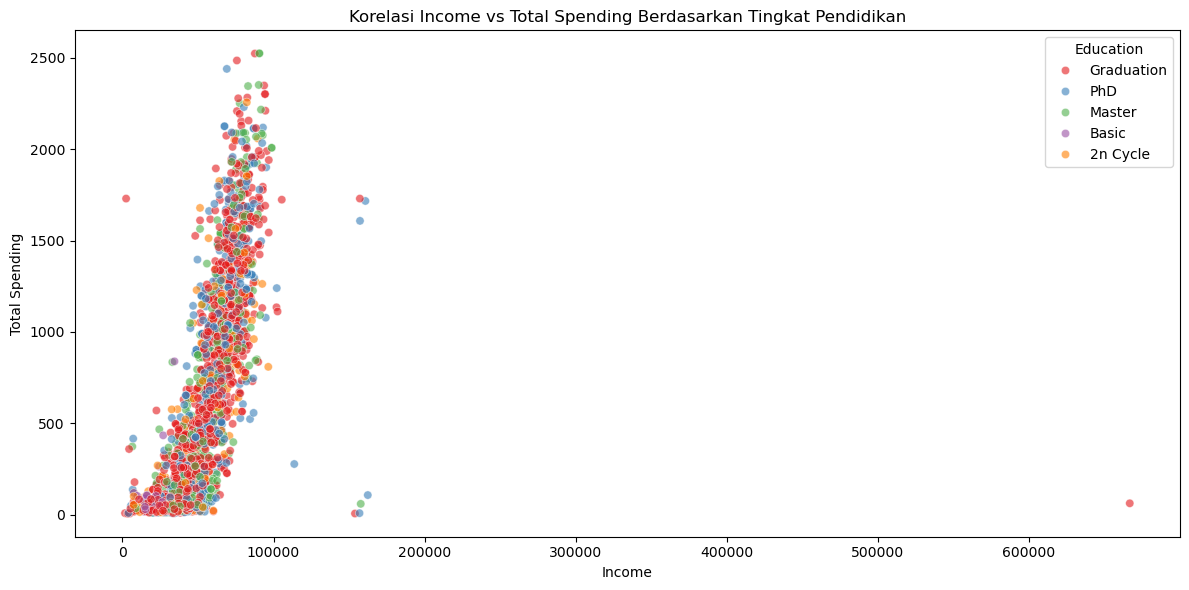

In [444]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data = df_corr,
    x = "Income",
    y = "Total Spending",
    hue = "Education",
    alpha = 0.6,
    palette = "Set1"
)
plt.title("Korelasi Income vs Total Spending Berdasarkan Tingkat Pendidikan")
plt.tight_layout()
plt.show()

C:\Users\Sarah Agnisa\AppData\Local\Temp\ipykernel_1600\1949826756.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


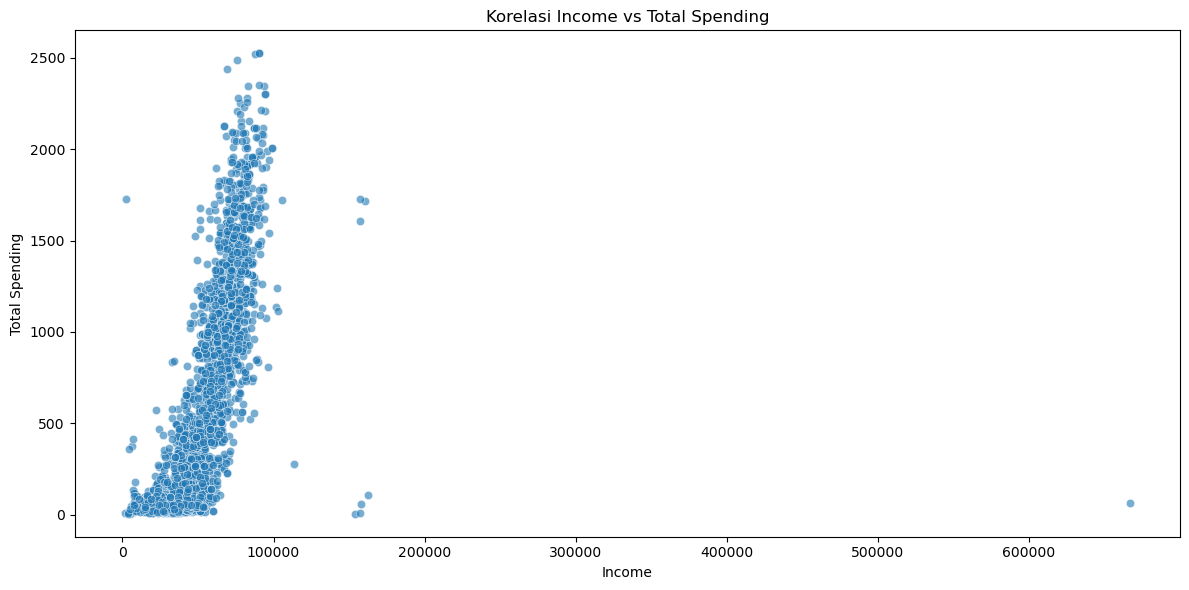

In [445]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data = df_corr,
    x = "Income",
    y = "Total Spending",
    alpha = 0.6,
    palette = "Set1"
)
plt.title("Korelasi Income vs Total Spending")
plt.tight_layout()
plt.show()

## Berdasarkan Channel Pembelian:

Selanjutnya, setelah membahas dan menganalisis pengeluaran/Total Spending, kita akan menganalisis mengenai Pembelian

Disini terdapat 3 channel untuk melakukan pembelian yaitu `NumWebPurchases`, `NumCatalogPurchases`, dan `NumStorePurchases`.
Kita akan menggunakan barplot untuk mengetahui channel mana yang lebih disukai oleh para pelanggan (segmentasi Education dan Marital Status) dalam melakukan transaksi pembelian.

Untuk `NumDealsPurcahses` tidak termasuk ke dalam channel, karena ini hanya sifat pembelian saja, yaitu apakah pembelian ini menggunakan diskon/promo atau tidak. Jika kita memasukkan `NumDealsPurcahses` ke dalam analisis pembelian kita, maka akan terjadi *double counting*.

In [446]:
# copy df terlebih dahulu
df_purchases = df_new.copy()

In [447]:
# Reshape ke format long
df_long = df_purchases.melt(
    id_vars = ["ID", "Education", "Marital_Status"],
    value_vars=["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"],
    var_name="Channel",
    value_name="Jumlah_Pembelian")

In [448]:
df_long.sort_values(by = "ID", inplace = True)

In [449]:
df_long.reset_index(inplace = True)

In [450]:
df_long.drop(columns="index", inplace = True)
df_long

,ID,Education,Marital_Status,Channel,Jumlah_Pembelian
0,0,Graduation,Married,NumCatalogPurchases,4
1,0,Graduation,Married,NumWebPurchases,3
2,0,Graduation,Married,NumStorePurchases,9
3,1,Graduation,Single,NumStorePurchases,7
4,1,Graduation,Single,NumCatalogPurchases,3
...,...,...,...,...,...
6715,999,Graduation,Single,NumWebPurchases,6
6716,999,Graduation,Single,NumCatalogPurchases,7
6717,9999,Graduation,Together,NumStorePurchases,9
6718,9999,Graduation,Together,NumWebPurchases,9


In [516]:
df_long["Jumlah_Pembelian"].sum()

28083

C:\Users\Sarah Agnisa\AppData\Local\Temp\ipykernel_1600\2005685265.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=df_long,
C:\Users\Sarah Agnisa\AppData\Local\Temp\ipykernel_1600\2005685265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_long,


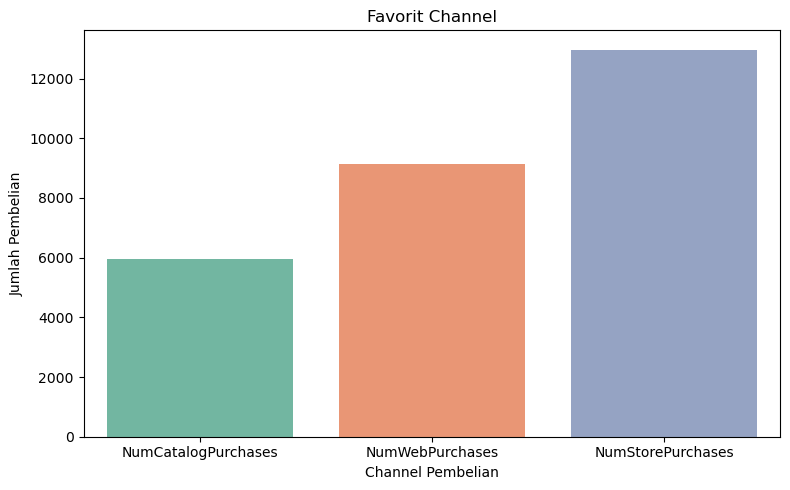

In [512]:
# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(data=df_long,
            x="Channel",
            y="Jumlah_Pembelian",
            palette="Set2",
            estimator = "sum",
            ci = 0)
plt.title("Favorit Channel")
plt.xlabel("Channel Pembelian")
plt.ylabel("Jumlah Pembelian")
plt.tight_layout()
plt.show()

C:\Users\Sarah Agnisa\AppData\Local\Temp\ipykernel_1600\1066952562.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=df_long,


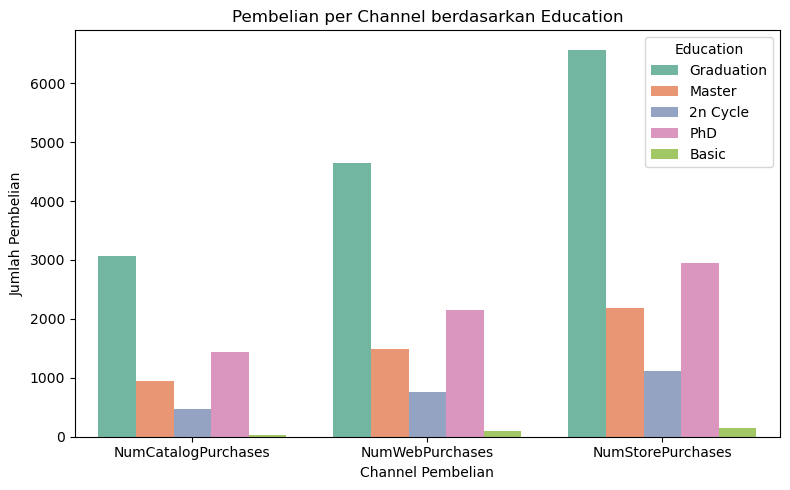

In [501]:
# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(data=df_long,
            x="Channel",
            y="Jumlah_Pembelian",
            palette="Set2",
            hue = "Education",
            estimator = "sum",
            ci = 0)
plt.title("Pembelian per Channel berdasarkan Education")
plt.xlabel("Channel Pembelian")
plt.ylabel("Jumlah Pembelian")
plt.tight_layout()
plt.show()

In [515]:
# Buat pivot table: Total pembelian per Channel dan Education
pivot_edu_purchases = df_long.pivot_table(
    values="Jumlah_Pembelian",
    index="Channel",
    columns="Education",
    aggfunc="sum",
    fill_value=0
)

pivot_edu_purchases

Education,2n Cycle,Basic,Graduation,Master,PhD
Channel,,,,,
NumCatalogPurchases,471,26,3072,951,1443
NumStorePurchases,1118,154,6570,2182,2946
NumWebPurchases,757,102,4649,1492,2150


C:\Users\Sarah Agnisa\AppData\Local\Temp\ipykernel_1600\757545647.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=df_long,


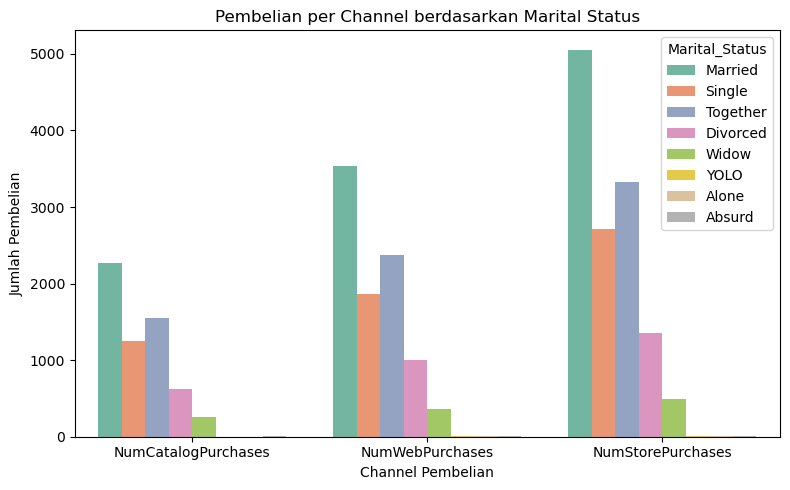

In [499]:
# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(data=df_long,
            x="Channel",
            y="Jumlah_Pembelian",
            palette="Set2",
            hue = "Marital_Status",
            estimator = "sum",
            ci = 0)
plt.title("Pembelian per Channel berdasarkan Marital Status")
plt.xlabel("Channel Pembelian")
plt.ylabel("Jumlah Pembelian")
plt.tight_layout()
plt.show()

In [497]:
# Buat pivot table: Total pembelian per Channel dan Education
pivot_marital_purchases = df_long.pivot_table(
    values="Jumlah_Pembelian",
    index="Channel",
    columns="Marital_Status",
    aggfunc="sum",
    fill_value=0
)

pivot_marital_purchases

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Channel,,,,,,,,
NumCatalogPurchases,15,2,620,2268,1248,1552,256,2
NumStorePurchases,13,12,1350,5055,2707,3327,494,12
NumWebPurchases,7,15,1000,3532,1859,2367,356,14


## Berdasarkan Jumlah Anak

C:\Users\Sarah Agnisa\AppData\Local\Temp\ipykernel_1600\3564156633.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=child_spending, x="Totalchildren", y="Total Spending", palette="coolwarm")


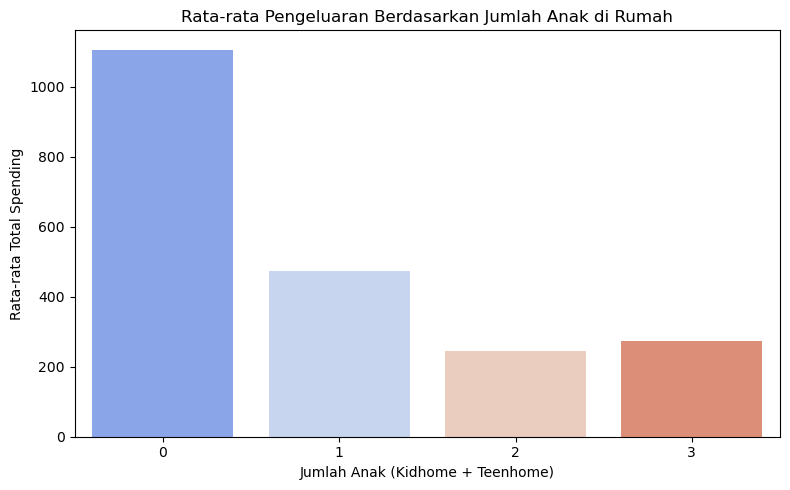

In [517]:
# Buat Kolom baru untuk total anak
df_new["Totalchildren"] = df_new["Kidhome"] + df_new["Teenhome"]

# hitung rata-rata pengeluaran berdasarkan jumlah anak
child_spending = df_new.groupby(by ="Totalchildren")["Total Spending"].mean().sort_values().reset_index()

# visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(data=child_spending, x="Totalchildren", y="Total Spending", palette="coolwarm")

plt.title("Rata-rata Pengeluaran Berdasarkan Jumlah Anak di Rumah")
plt.xlabel("Jumlah Anak (Kidhome + Teenhome)")
plt.ylabel("Rata-rata Total Spending")
plt.tight_layout()
plt.show()

In [518]:
# table summary child_spending
child_spending.sort_values(by = "Total Spending", ascending= False)

,Totalchildren,Total Spending
3,0,1106.029781
2,1,472.733156
1,3,274.603774
0,2,245.947743


## Berdasarkan Kampanye Marketing

In [458]:
campaign_cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]

# Hitung total pelanggan yang merespons masing-masing kampanye
campaign_success = df_new[campaign_cols].sum().sort_values(ascending=False)

In [459]:
campaign_success

Response        334
AcceptedCmp4    167
AcceptedCmp3    163
AcceptedCmp5    163
AcceptedCmp1    144
AcceptedCmp2    30 
dtype: int64

C:\Users\Sarah Agnisa\AppData\Local\Temp\ipykernel_1600\554334598.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_success.index, y=campaign_success.values, palette="Set2")


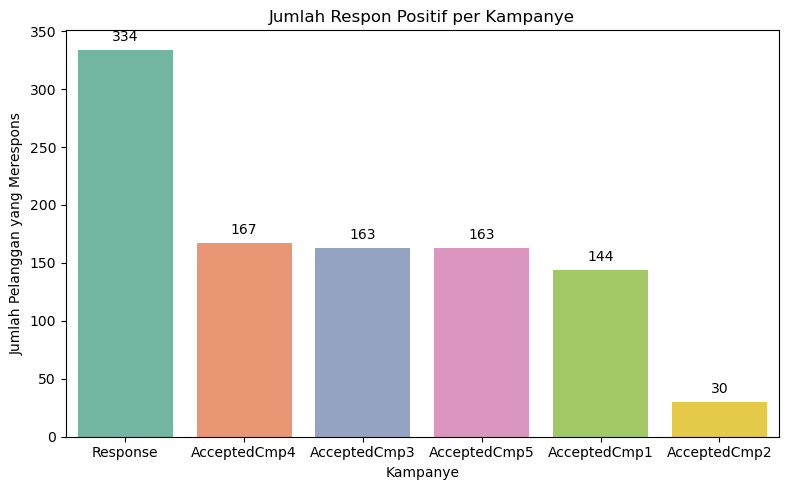

In [460]:
plt.figure(figsize=(8, 5))
sns.barplot(x=campaign_success.index, y=campaign_success.values, palette="Set2")

# Anotasi
for i, val in enumerate(campaign_success.values):
    plt.text(i, val + 5, str(val), ha='center', va='bottom')

plt.title("Jumlah Respon Positif per Kampanye")
plt.ylabel("Jumlah Pelanggan yang Merespons")
plt.xlabel("Kampanye")
plt.tight_layout()
plt.show()

In [461]:
# copy df terlebih dahulu
df_campaign = df_new.copy()

In [462]:
# Reshape ke format long
df_campaign_long = df_campaign.melt(
    id_vars = ["ID", "Education", "Marital_Status"],
    value_vars=["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"],
    var_name="Campaign",
    value_name="Respon Pelanggan")

In [464]:
# Filter hanya respon yang bernilai 1 (berarti merespons kampanye)
df_campaign_long = df_campaign_long[df_campaign_long["Respon Pelanggan"] == 1]

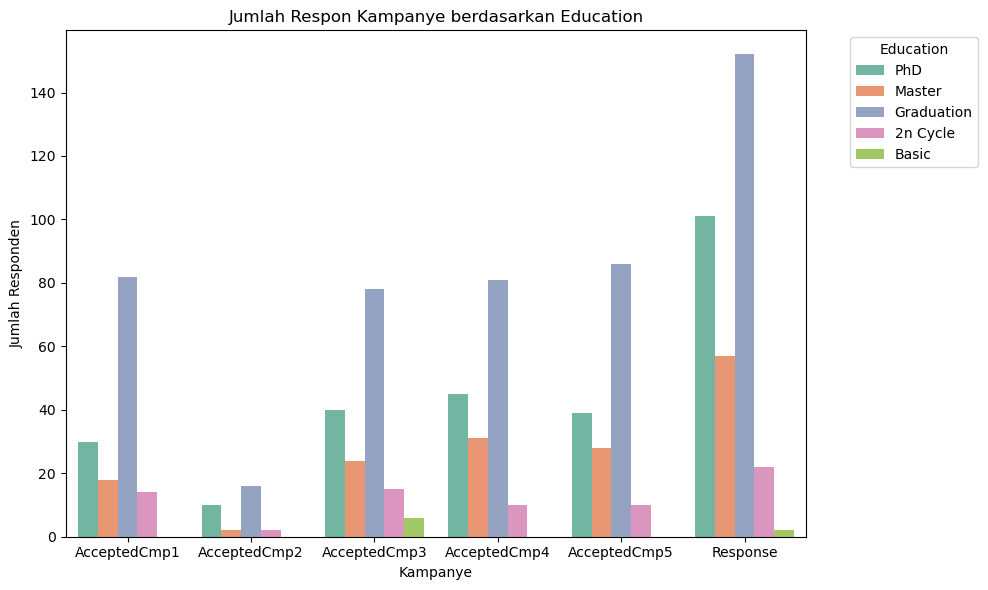

In [466]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_campaign_long,
    x="Campaign",
    hue="Education",
    palette="Set2"
)

plt.title("Jumlah Respon Kampanye berdasarkan Education")
plt.xlabel("Kampanye")
plt.ylabel("Jumlah Responden")
plt.legend(title="Education", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [471]:
# Buat pivot table: Jumlah Respon pelanggan terhadap tiap campaign berdasarkan education
pivot_edu_campaign = df_campaign_long.pivot_table(
    values="Respon Pelanggan",
    index="Campaign",
    columns="Education",
    aggfunc="sum",
    fill_value=0
)

pivot_edu_campaign

Education,2n Cycle,Basic,Graduation,Master,PhD
Campaign,,,,,
AcceptedCmp1,14,0,82,18,30
AcceptedCmp2,2,0,16,2,10
AcceptedCmp3,15,6,78,24,40
AcceptedCmp4,10,0,81,31,45
AcceptedCmp5,10,0,86,28,39
Response,22,2,152,57,101


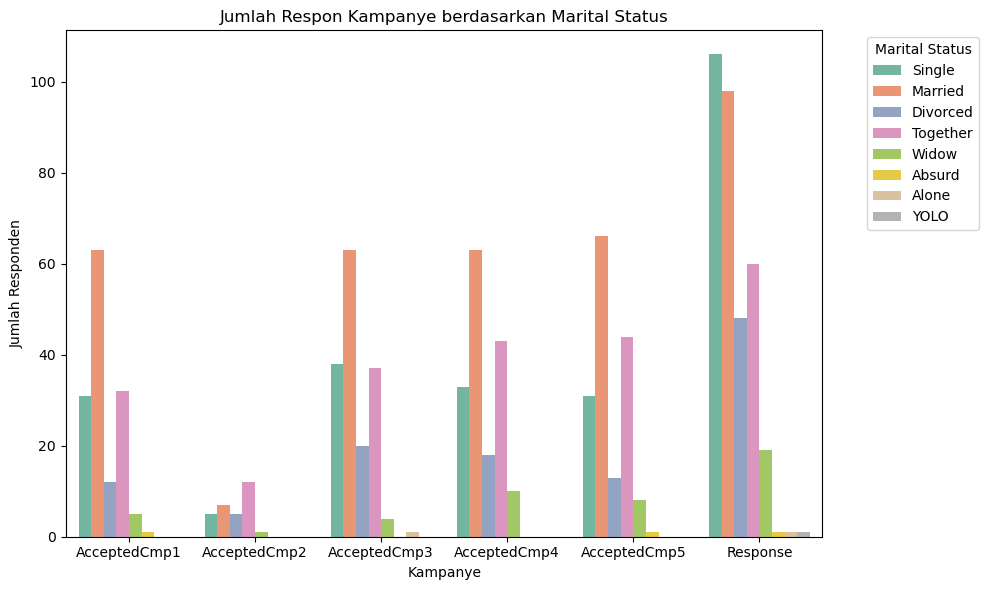

In [470]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_campaign_long,
    x="Campaign",
    hue="Marital_Status",
    palette="Set2"
)

plt.title("Jumlah Respon Kampanye berdasarkan Marital Status")
plt.xlabel("Kampanye")
plt.ylabel("Jumlah Responden")
plt.legend(title="Marital Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [474]:
# Buat pivot table: Jumlah Respon pelanggan terhadap tiap campaign berdasarkan Marital Status
pivot_edu_campaign = df_campaign_long.pivot_table(
    values="Respon Pelanggan",
    index="Campaign",
    columns="Marital_Status",
    aggfunc="sum",
    fill_value=0
)

pivot_edu_campaign

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Campaign,,,,,,,,
AcceptedCmp1,1,0,12,63,31,32,5,0
AcceptedCmp2,0,0,5,7,5,12,1,0
AcceptedCmp3,0,1,20,63,38,37,4,0
AcceptedCmp4,0,0,18,63,33,43,10,0
AcceptedCmp5,1,0,13,66,31,44,8,0
Response,1,1,48,98,106,60,19,1


## Berdasarkan Produk

In [475]:
df_products = df_new.copy()

In [476]:
df_products_long = df_products.melt(
    id_vars=["ID", "Education", "Marital_Status"],
    value_vars= spending_columns,
    var_name= "Jenis Produk",
    value_name= "Pengeluaran"
)

C:\Users\Sarah Agnisa\AppData\Local\Temp\ipykernel_1600\1975656807.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(


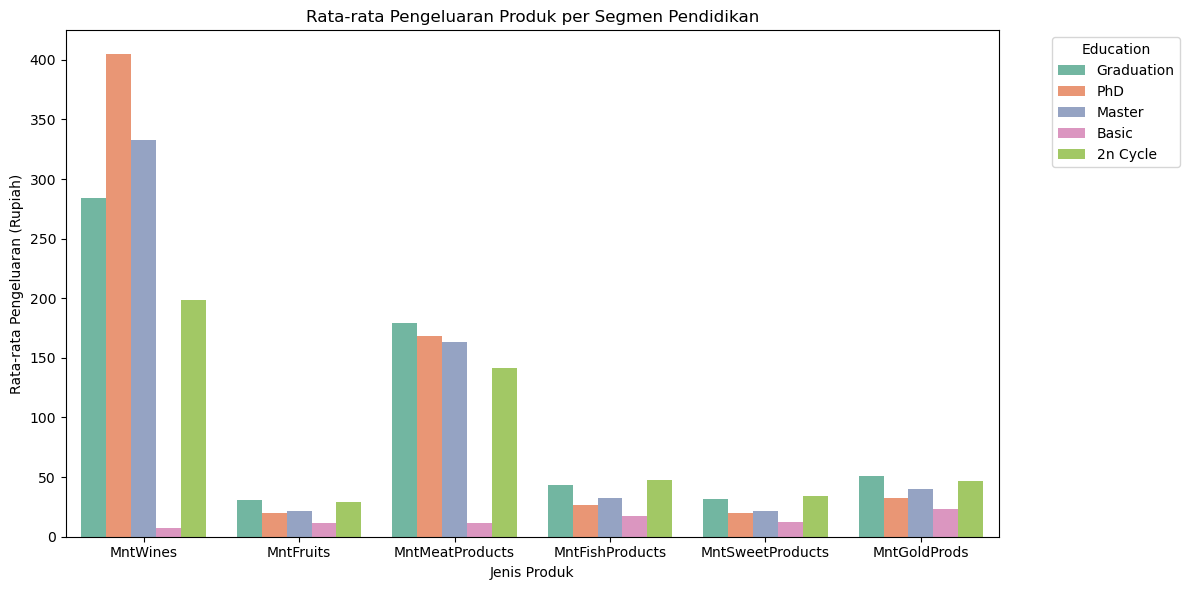

In [495]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_products_long,
    x="Jenis Produk",
    y="Pengeluaran",
    hue="Education",
    palette="Set2",
    ci = 0
)

plt.title("Rata-rata Pengeluaran Produk per Segmen Pendidikan")
plt.xlabel("Jenis Produk")
plt.ylabel("Rata-rata Pengeluaran (Rupiah)")
plt.legend(title="Education", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [496]:
# Buat pivot table: Jumlah Respon pelanggan terhadap tiap campaign berdasarkan education
pivot_edu_prods = df_products_long.pivot_table(
    values="Pengeluaran",
    index="Jenis Produk",
    columns="Education",
    aggfunc="mean",
    fill_value=0
)

pivot_edu_prods

Education,2n Cycle,Basic,Graduation,Master,PhD
Jenis Produk,,,,,
MntFishProducts,47.482759,17.055556,43.149956,32.100000,26.728395
MntFruits,28.955665,11.111111,30.774623,21.654054,20.049383
MntGoldProds,46.399015,22.833333,50.849157,40.397297,32.310700
MntMeatProducts,141.256158,11.444444,179.488909,163.378378,168.602881
MntSweetProducts,34.251232,12.111111,31.367347,21.175676,20.222222
MntWines,198.182266,7.240741,284.268855,333.075676,404.495885
